In [2]:
# mouunt drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf




In [4]:
# load the dataset
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard_fraud_detection/creditcard.csv')
data.describe() # to view the statistical summary of the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


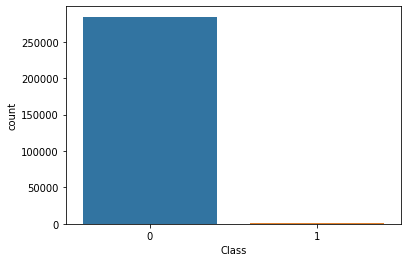

In [5]:
# explore the dataset
data.head(10) # to view the first few rows of the dataset
data.describe() # to view the statistical summary of the dataset
data.isnull().sum() # to check for missing values
sns.countplot('Class', data=data) # to check the class distribution


In [6]:
# get the number of ocurrences for each class
class_counts = data['Class'].value_counts()
print(class_counts)

0    284315
1       492
Name: Class, dtype: int64


In [7]:
# preprocess the data
X = data.drop(['Class'], axis=1) # input features
y = data['Class'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Build the model
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=24, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=24, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

In [9]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# train the model
model.fit(X_train, y_train, batch_size=15, epochs=5)

# results indicate loss decreasing over each epoch and accuracy increasing, 
# indicating that the model is learning and well fitting the data


Epoch 1/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0104 - accuracy: 0.9976
Epoch 2/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 3/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0031 - accuracy: 0.9994


In [11]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0062 - accuracy: 0.9994
Test accuracy: 0.9993914365768433


In [12]:
# make predictions
predictions = model.predict(X_test)

2671/2671 [==============================] - 3s 1ms/step


In [14]:
# evaluete the model performance
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred))

2671/2671 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       147

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
